# Tratamento de um conjunto de dados de carros obtido do Kaggle

Notebook de referência utilizado:  https://nbviewer.jupyter.org/github/Tanu-N-Prabhu/Python/blob/master/Exploratory_data_Analysis.ipynb

__Importando as bibliotecas__

In [1]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from scipy import stats

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head(3)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350


Verificando o tipo de cada variavel, para ver se não há nenhuma string no lugar de números, por exemplo

In [4]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

**MSRP = PRICE = manufacturer's suggested retail price
MPG = MILES PER GALLON**

In [5]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)

In [6]:
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


Renomeando as colunas para nomes mais intuitivos

In [7]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


Após limpar as features não utilizadas, e renomear as colunas, vamos ver se há linhas em duplicata nos nossos dados:

In [8]:
df.shape

(11914, 10)

**Identificando quais linhas estão em duplicata**

In [9]:
duplicate_rows_df = df[df.duplicated()]  #Essas são as linhas que estão em duplicata

In [10]:
duplicate_rows_df.head(8)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
14,BMW,1 Series,2013,230.0,6.0,MANUAL,rear wheel drive,28,19,31500
18,Audi,100,1992,172.0,6.0,MANUAL,front wheel drive,24,17,2000
20,Audi,100,1992,172.0,6.0,MANUAL,front wheel drive,24,17,2000
24,Audi,100,1993,172.0,6.0,MANUAL,front wheel drive,24,17,2000
25,Audi,100,1993,172.0,6.0,MANUAL,front wheel drive,24,17,2000
62,Audi,200,1991,217.0,5.0,MANUAL,all wheel drive,22,16,2000
88,Nissan,200SX,1996,115.0,4.0,MANUAL,front wheel drive,36,26,2000
92,Nissan,200SX,1997,115.0,4.0,MANUAL,front wheel drive,35,25,2000


In [11]:
print("Número de linhas em duplicata: ", duplicate_rows_df.shape)

Número de linhas em duplicata:  (989, 10)


Logo, há 989 linhas com dados em duplicata!!!!!

In [12]:
df.count()

Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive Mode      11914
MPG-H           11914
MPG-C           11914
Price           11914
dtype: int64

**Removendo todas as linhas do df que está em duplicata!Note que primeiro criamos uma duplicate(matriz com os dados duplicados para ver quais são os duplicados, drop_duplicate é o comando para remover**

In [13]:
df = df.drop_duplicates()
df.head(3)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350


In [14]:
df.shape

(10925, 10)

In [15]:
df.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

Perceba acima que possui features que possui menos linhas que outras, então como já retiramosas linhas em duplicata, restam as linhas com NaN, já que o comando count retorna somente as features com dados preenchidos

In [16]:
df.isnull().sum()

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64

**Comando dropna remove toda as linhas com NaN**

In [17]:
df = df.dropna()

In [18]:
df.shape

(10827, 10)

In [19]:
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

In [20]:
df.isnull().sum()

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64

**Note que agora não há nenhuma feature com valor Nulo, ou duplicado**

 # Identificando outliers que podem comprometer o treinamento de modelos

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

Utilizando boxplot e a técnica de IQR

<AxesSubplot:xlabel='Price'>

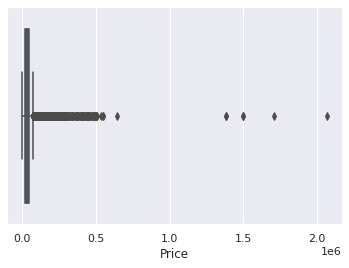

In [21]:
sns.boxplot(x=df['Price'])

<AxesSubplot:xlabel='HP'>

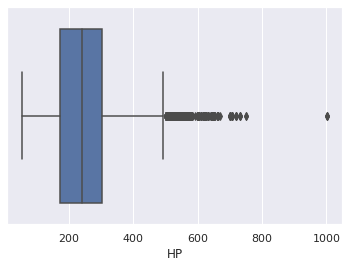

In [22]:
sns.boxplot(x=df['HP'])

<AxesSubplot:xlabel='Cylinders'>

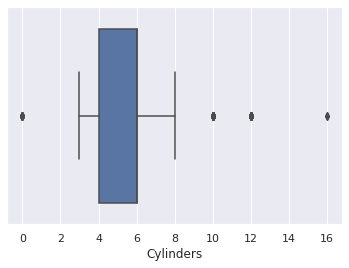

In [23]:
sns.boxplot(x=df['Cylinders'])

In [24]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64


In [25]:
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


(9191, 10)

Quantidade de outliers será : 10827-9191 ~ cerca de 1600 linhas

O comando value_counts : The resulting object will be in descending order so that the first element is the most frequently-occurring element
nlarget: mostrando os 40 primeiros
kind = tipo de plots em um dataframe

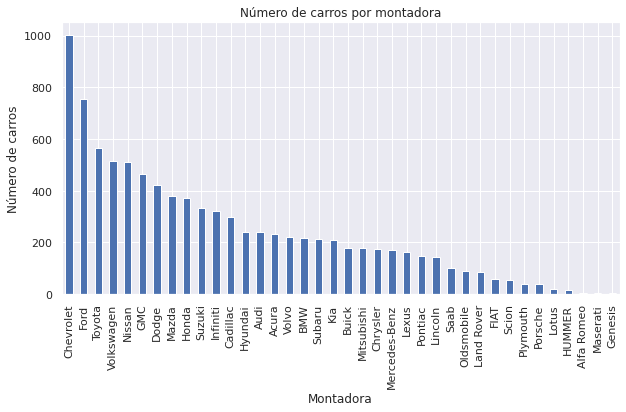

In [26]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Número de carros por montadora")
plt.ylabel('Número de carros')
plt.xlabel('Montadora');

**Mapa de calor de uma matriz de correlação, ajuda a identificar quais variáveis possuem alta correlação**

In [27]:
c = df.corr() #cálculo da matriz de correlação

<AxesSubplot:>

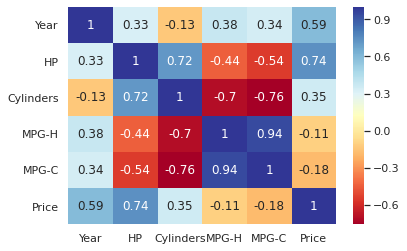

In [28]:
sns.heatmap(c,cmap="RdYlBu",annot=True)

Uma outra técnica é utilizar um **Z-score**
The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.
You must be wondering that, how does this help in identifying the outliers? Well, while calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

# Scatterplot

Através de um scatter plot é possível ver a correlação positiva ou negativa entre features

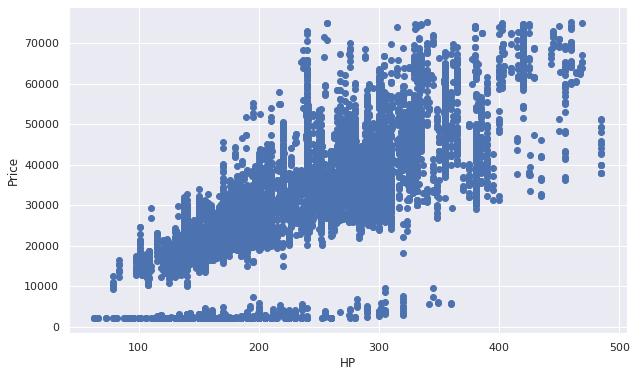

In [35]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()